# AI Jobs Market Analysis: State-by-State & Industry Deep Dive
## 2025 AI Index Report Data

This notebook analyzes AI employment by **US State** and **Industry Sector** to identify geographic hotspots and sectoral trends.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

data_path = Path('/Users/matthewgrossman/Desktop/PUBLIC DATA_ 2025 AI Index Report/4. Economy/Data')
print("✓ Libraries loaded and ready")

✓ Libraries loaded and ready


## 1. US State Analysis - AI Job Distribution

In [4]:
# Load US state AI job data
us_states_df = pd.read_csv(data_path / 'fig_4.2.10.csv')
us_states_df['pct'] = us_states_df['Percentage of US AI job postings'].str.rstrip('%').astype('float')
us_states_df = us_states_df.sort_values('pct', ascending=False)

print("\n📊 US STATE AI JOB DISTRIBUTION\n")
print(f"Total States: {len(us_states_df)}")
print(f"Average % per state: {us_states_df['pct'].mean():.2f}%")
print(f"Median % per state: {us_states_df['pct'].median():.2f}%")
print(f"\n🔝 TOP 15 STATES:")
top_15 = us_states_df.head(15)
for idx, row in top_15.iterrows():
    print(f"{row['State code']:>3}: {row['pct']:>6.2f}%")

print(f"\n⬇️  BOTTOM 10 STATES:")
bottom_10 = us_states_df.tail(10)
for idx, row in bottom_10.iterrows():
    print(f"{row['State code']:>3}: {row['pct']:>6.2f}%")


📊 US STATE AI JOB DISTRIBUTION

Total States: 51
Average % per state: 1.96%
Median % per state: 1.04%

🔝 TOP 15 STATES:
 CA:  15.70%
 TX:   8.77%
 NY:   5.76%
 VA:   4.74%
 WA:   4.72%
 MA:   4.42%
 IL:   3.97%
 FL:   3.83%
 GA:   3.08%
 NJ:   2.96%
 PA:   2.93%
 NC:   2.87%
 OH:   2.51%
 CO:   2.42%
 MI:   2.37%

⬇️  BOTTOM 10 STATES:
 MS:   0.44%
 HI:   0.41%
 ME:   0.38%
 MT:   0.37%
 AK:   0.34%
 SD:   0.28%
 ND:   0.24%
 VT:   0.20%
 WV:   0.20%
 WY:   0.15%


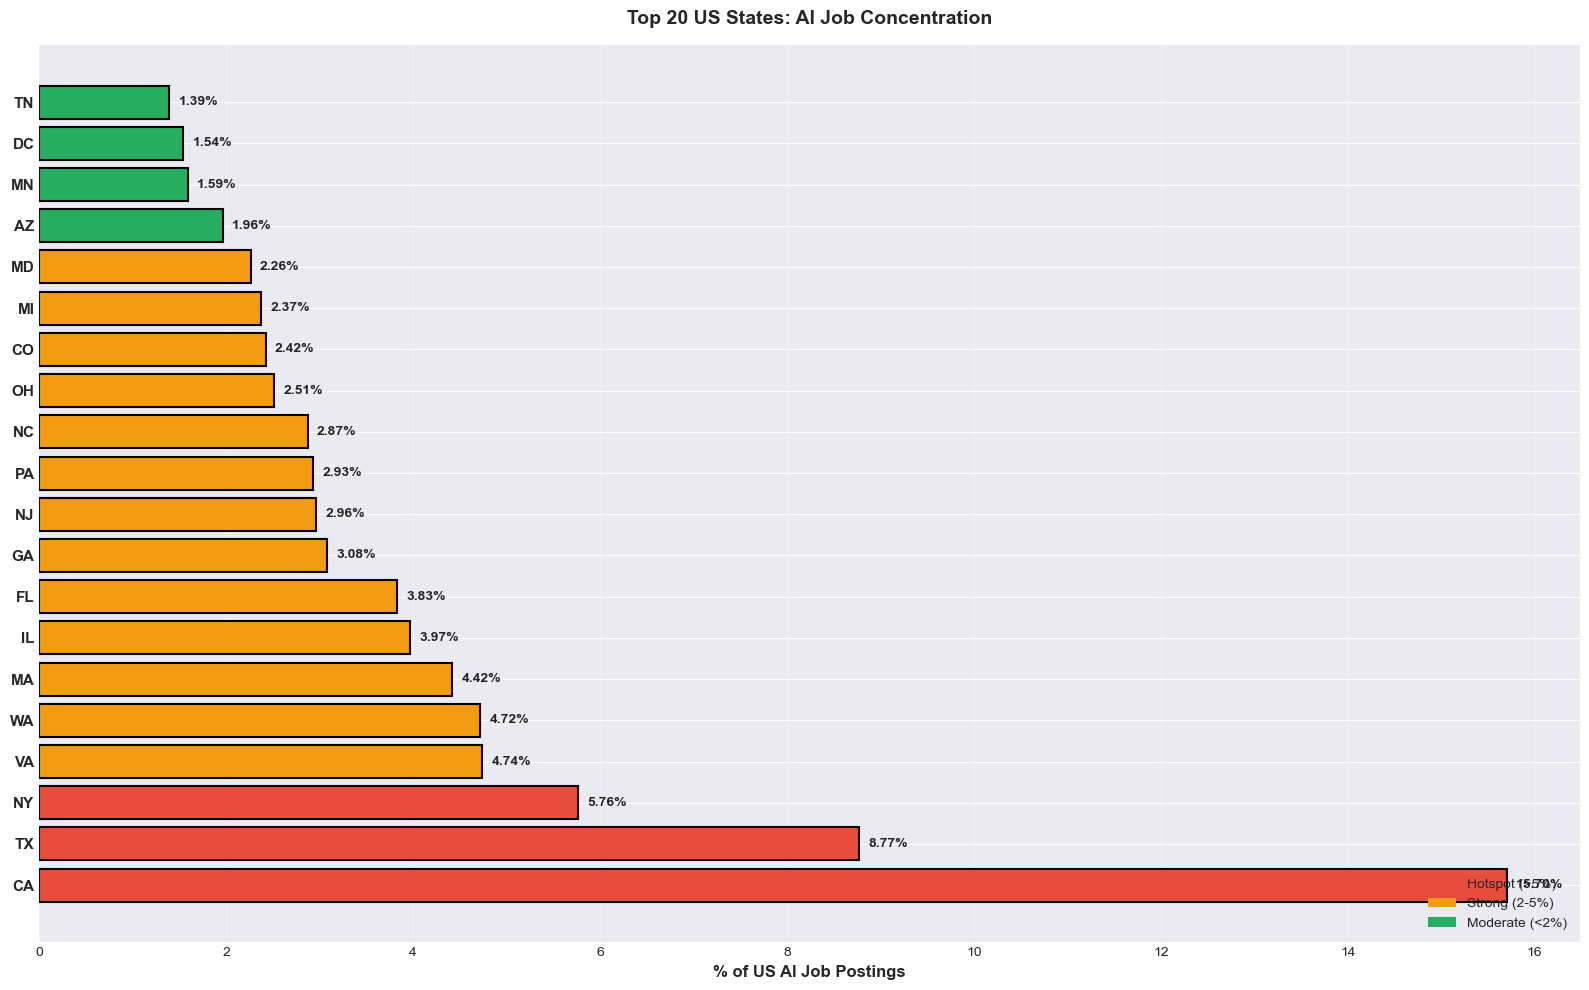


💡 Top 3 States Account For: 30.2% of all US AI jobs
💡 Top 10 States Account For: 57.9% of all US AI jobs


In [5]:
# Visualization 1: Geographic concentration
fig, ax = plt.subplots(figsize=(16, 10))

top_20_states = us_states_df.head(20)
colors = ['#e74c3c' if pct > 5 else '#f39c12' if pct > 2 else '#27ae60' for pct in top_20_states['pct']]

bars = ax.barh(range(len(top_20_states)), top_20_states['pct'].values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(top_20_states)))
ax.set_yticklabels(top_20_states['State code'].values, fontsize=11, fontweight='bold')
ax.set_xlabel('% of US AI Job Postings', fontsize=12, fontweight='bold')
ax.set_title('Top 20 US States: AI Job Concentration', fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (state, pct) in enumerate(zip(top_20_states['State code'], top_20_states['pct'])):
    ax.text(pct + 0.1, i, f'{pct:.2f}%', va='center', fontweight='bold', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#e74c3c', label='Hotspot (>5%)'),
                   Patch(facecolor='#f39c12', label='Strong (2-5%)'),
                   Patch(facecolor='#27ae60', label='Moderate (<2%)')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n💡 Top 3 States Account For: {us_states_df.head(3)['pct'].sum():.1f}% of all US AI jobs")
print(f"💡 Top 10 States Account For: {us_states_df.head(10)['pct'].sum():.1f}% of all US AI jobs")

## 2. Industry Sector Analysis

In [6]:
# Load industry sector data  
sector_df = pd.read_csv(data_path / 'fig_4.2.7.csv')

# Clean sector data
sector_df['AI_pct'] = sector_df['AI Job Postings (% of All Job Postings)'].str.rstrip('%').astype('float')

# Compare 2023 vs 2024
sector_2023 = sector_df[sector_df['Year'] == 2023].sort_values('AI_pct', ascending=False)
sector_2024 = sector_df[sector_df['Year'] == 2024].sort_values('AI_pct', ascending=False)

print("\n📈 INDUSTRY SECTORS: AI JOB CONCENTRATION\n")
print("2024 Rankings (% of all jobs in that sector):")
for idx, row in sector_2024.iterrows():
    print(f"{row['Sector']:<60} {row['AI_pct']:>6.2f}%")

# Calculate growth
merged_sectors = sector_2023[['Sector', 'AI_pct']].merge(
    sector_2024[['Sector', 'AI_pct']], 
    on='Sector', 
    suffixes=('_2023', '_2024')
)
merged_sectors['growth_pct'] = merged_sectors['AI_pct_2024'] - merged_sectors['AI_pct_2023']
merged_sectors = merged_sectors.sort_values('growth_pct', ascending=False)

print("\n\n📊 2023→2024 GROWTH (Percentage Point Change):")
for idx, row in merged_sectors.iterrows():
    growth_indicator = "📈" if row['growth_pct'] > 0 else "📉"
    print(f"{growth_indicator} {row['Sector']:<50} +{row['growth_pct']:>6.2f}pp")


📈 INDUSTRY SECTORS: AI JOB CONCENTRATION

2024 Rankings (% of all jobs in that sector):
Information                                                    9.33%
Professional, scientific, and technical services               5.25%
Finance and insurance                                          3.76%
Manufacturing                                                  3.75%
Utilities                                                      2.15%
Educational services                                           2.05%
Management of companies and enterprises                        1.92%
Mining, quarrying, and oil and gas extraction                  1.87%
Public administration                                          1.29%
Real estate and rental and leasing                             1.21%
Wholesale trade                                                1.20%
Retail trade                                                   1.16%
Agriculture, forestry, fishing and hunting                     1.07%
Transportation

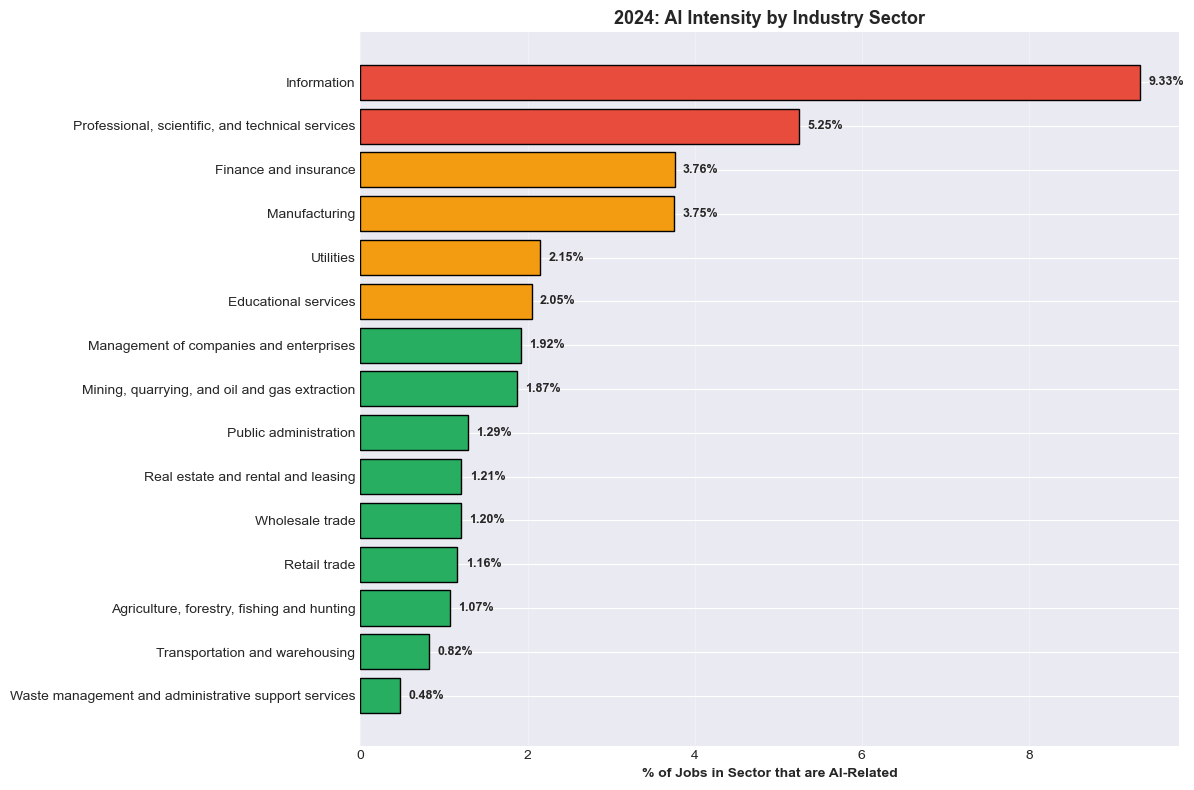


🎯 Highest AI Intensity: Information (9.33%)
📉 Lowest AI Intensity: Waste management and administrative support services (0.48%)


In [7]:
# Visualization 2: Industry Sector Comparison
fig, ax = plt.subplots(figsize=(12, 8))

sectors_sorted = sector_2024.sort_values('AI_pct', ascending=True)

colors_sector = ['#27ae60' if pct < 2 else '#f39c12' if pct < 5 else '#e74c3c' for pct in sectors_sorted['AI_pct']]

ax.barh(range(len(sectors_sorted)), sectors_sorted['AI_pct'].values, color=colors_sector, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(sectors_sorted)))
ax.set_yticklabels(sectors_sorted['Sector'].values, fontsize=10)
ax.set_xlabel('% of Jobs in Sector that are AI-Related', fontweight='bold')
ax.set_title('2024: AI Intensity by Industry Sector', fontweight='bold', fontsize=13)
ax.grid(axis='x', alpha=0.3)

for i, (sector, pct) in enumerate(zip(sectors_sorted['Sector'], sectors_sorted['AI_pct'])):
    ax.text(pct + 0.1, i, f'{pct:.2f}%', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n🎯 Highest AI Intensity: {sector_2024.iloc[0]['Sector']} ({sector_2024.iloc[0]['AI_pct']:.2f}%)")
print(f"📉 Lowest AI Intensity: {sector_2024.iloc[-1]['Sector']} ({sector_2024.iloc[-1]['AI_pct']:.2f}%)")

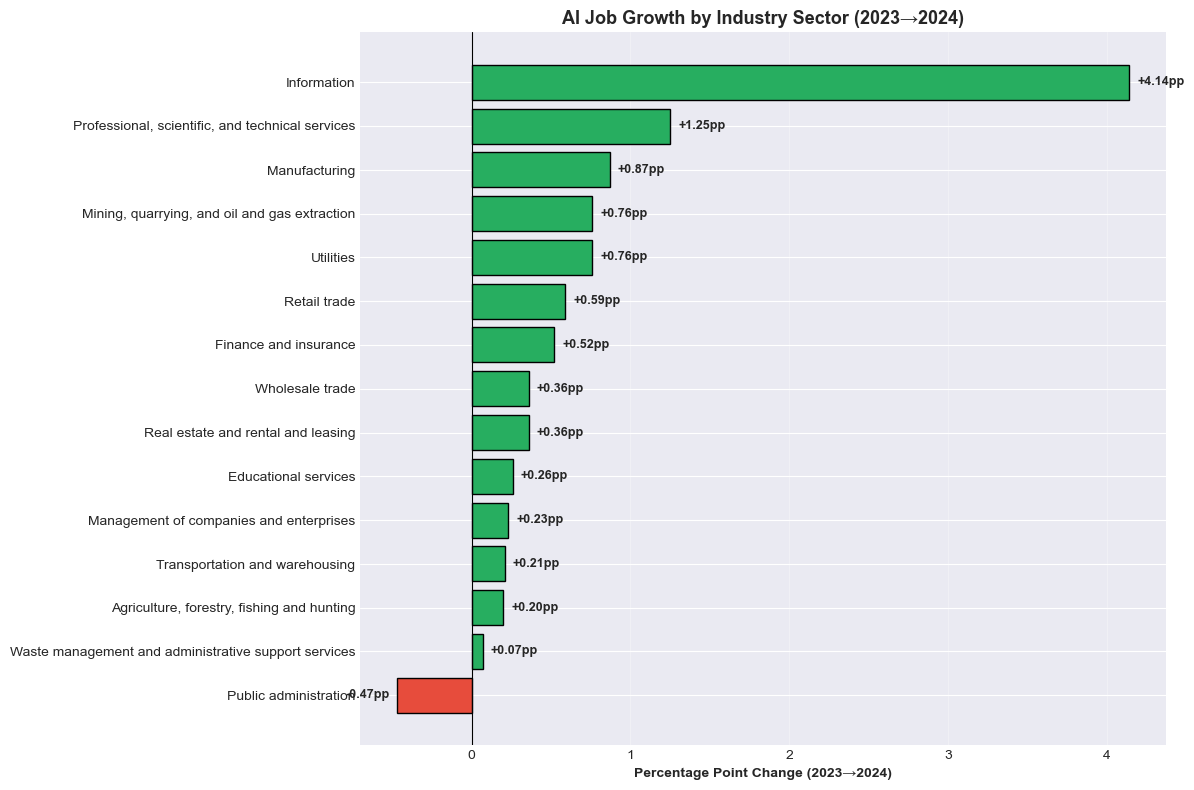

In [8]:
# Visualization 3: Sector Growth Comparison
fig, ax = plt.subplots(figsize=(12, 8))

growth_sorted = merged_sectors.sort_values('growth_pct')
colors_growth = ['#e74c3c' if g < 0 else '#27ae60' for g in growth_sorted['growth_pct']]

ax.barh(range(len(growth_sorted)), growth_sorted['growth_pct'].values, color=colors_growth, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(growth_sorted)))
ax.set_yticklabels(growth_sorted['Sector'].values, fontsize=10)
ax.set_xlabel('Percentage Point Change (2023→2024)', fontweight='bold')
ax.set_title('AI Job Growth by Industry Sector (2023→2024)', fontweight='bold', fontsize=13)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

for i, (sector, growth) in enumerate(zip(growth_sorted['Sector'], growth_sorted['growth_pct'])):
    ax.text(growth + (0.05 if growth > 0 else -0.05), i, f'{growth:+.2f}pp', 
           va='center', ha='left' if growth > 0 else 'right', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

## 3. AI Skills Clusters Analysis

In [9]:
# Load AI skills clusters (technical specializations)
skills_df = pd.read_csv(data_path / 'fig_4.2.3.csv')

# Clean skills data
skills_df['pct'] = skills_df['AI job postings (% of all job postings)'].str.rstrip('%').astype('float')

# Get latest year data
latest_year = skills_df['Year'].max()
latest_skills = skills_df[skills_df['Year'] == latest_year].sort_values('pct', ascending=False)

print(f"\n🔧 AI SKILLS CLUSTERS - {latest_year}\n")
for idx, row in latest_skills.iterrows():
    print(f"{row['Skill cluster']:<40} {row['pct']:>6.2f}% of all jobs")


🔧 AI SKILLS CLUSTERS - 2024

Artificial intelligence                    0.94% of all jobs
Machine learning                           0.92% of all jobs
Natural language processing                0.23% of all jobs
Generative AI                              0.22% of all jobs
Neural networks                            0.16% of all jobs
Autonomous driving                         0.13% of all jobs
Visual image recognition                   0.09% of all jobs
Robotics                                   0.07% of all jobs
AI ethics, governance, and regulations     0.02% of all jobs


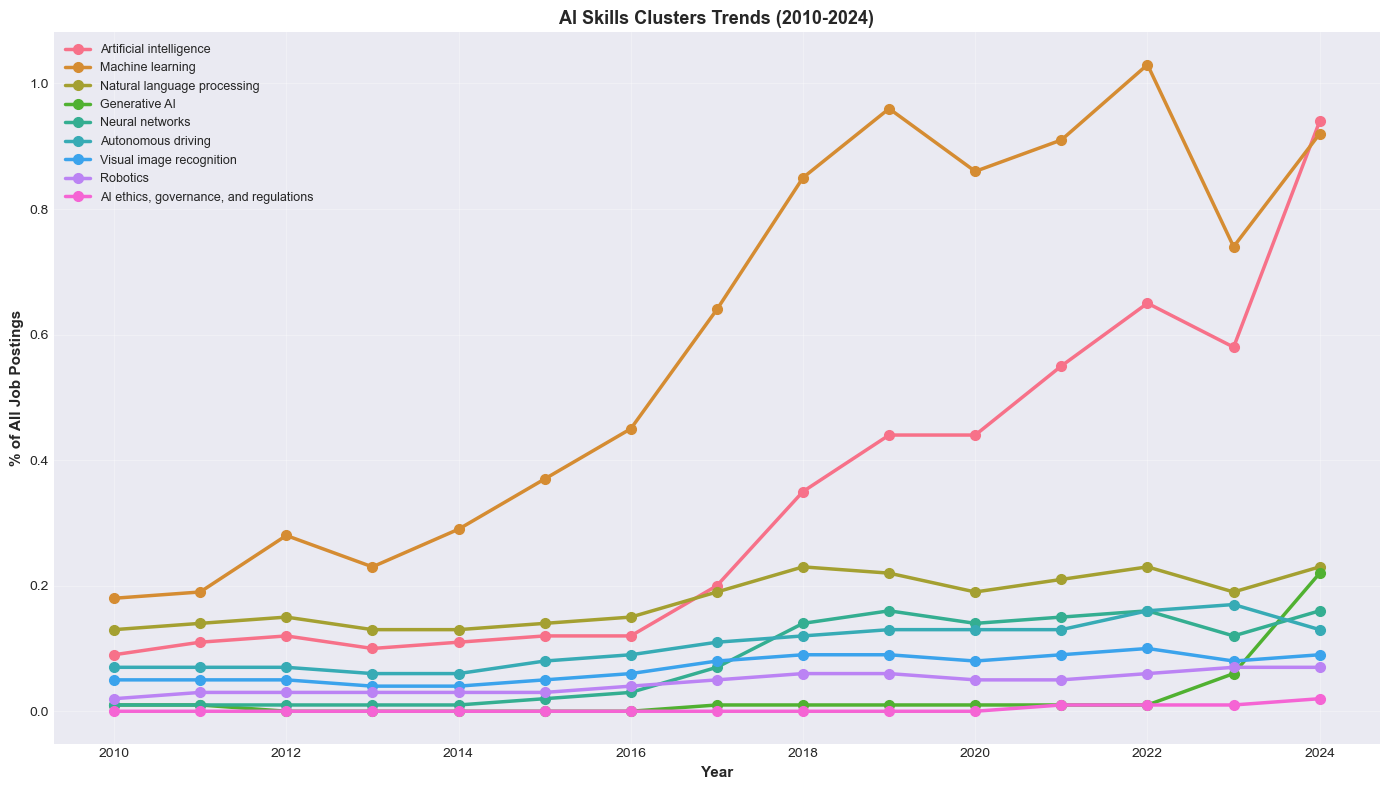


📊 Key Findings:
• Machine Learning remains dominant at 0.92%
• Generative AI explosive growth: 0.01% (2020) → 0.22% (2024)
• Natural Language Processing steady at ~0.23%


In [10]:
# Visualization 4: Skills Clusters Evolution
fig, ax = plt.subplots(figsize=(14, 8))

skills_list = latest_skills['Skill cluster'].unique()
colors_skills = sns.color_palette("husl", len(skills_list))

for skill, color in zip(skills_list, colors_skills):
    skill_data = skills_df[skills_df['Skill cluster'] == skill].sort_values('Year')
    ax.plot(skill_data['Year'], skill_data['pct'], 
           marker='o', linewidth=2.5, markersize=7, label=skill, color=color)

ax.set_xlabel('Year', fontweight='bold', fontsize=11)
ax.set_ylabel('% of All Job Postings', fontweight='bold', fontsize=11)
ax.set_title('AI Skills Clusters Trends (2010-2024)', fontweight='bold', fontsize=13)
ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Findings:")
print(f"• Machine Learning remains dominant at {latest_skills[latest_skills['Skill cluster']=='Machine learning']['pct'].values[0]:.2f}%")
print(f"• Generative AI explosive growth: 0.01% (2020) → {latest_skills[latest_skills['Skill cluster']=='Generative AI']['pct'].values[0]:.2f}% (2024)")
print(f"• Natural Language Processing steady at ~{latest_skills[latest_skills['Skill cluster']=='Natural language processing']['pct'].values[0]:.2f}%")

## 4. State Analysis - Deep Dive

In [11]:
# Load historical state trends
state_trends_df = pd.read_csv(data_path / 'fig_4.2.12.csv')

print("\n📈 MAJOR STATES - AI JOB POSTINGS TRENDS\n")

for state in ['California', 'Texas', 'New York', 'Washington']:
    state_data = state_trends_df[state_trends_df['State'] == state].sort_values('Year')
    if len(state_data) > 0:
        pct_2010 = state_data[state_data['Year'] == 2010]['Percentage of United States AI job postings'].values[0] if len(state_data[state_data['Year'] == 2010]) > 0 else 0
        pct_2024 = state_data[state_data['Year'] == 2024]['Percentage of United States AI job postings'].values[0] if len(state_data[state_data['Year'] == 2024]) > 0 else 0
        trend = "📈" if pct_2024 > pct_2010 else "📉"
        print(f"{trend} {state:<20} 2010: {pct_2010:>6.2f}% → 2024: {pct_2024:>6.2f}%")


📈 MAJOR STATES - AI JOB POSTINGS TRENDS



ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
# Visualization 5: Top states trends over time
fig, ax = plt.subplots(figsize=(14, 8))

top_states = ['California', 'Texas', 'New York', 'Washington']
colors_states = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

for state, color in zip(top_states, colors_states):
    state_data = state_trends_df[state_trends_df['State'] == state].sort_values('Year')
    pct_data = state_data['Percentage of United States AI job postings'].str.rstrip('%').astype('float')
    ax.plot(state_data['Year'], pct_data, 
           marker='o', linewidth=3, markersize=8, label=state, color=color)

ax.set_xlabel('Year', fontweight='bold', fontsize=12)
ax.set_ylabel('% of US AI Job Postings', fontweight='bold', fontsize=12)
ax.set_title('Top 4 States: AI Job Postings Trend (2010-2024)', fontweight='bold', fontsize=14)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Summary Dashboard & Insights

In [ ]:
summary_text = """
╔═══════════════════════════════════════════════════════════════════════════╗
║          STATE-BY-STATE AI JOBS MARKET: KEY INSIGHTS                    ║
╚═══════════════════════════════════════════════════════════════════════════╝

🔴 GEOGRAPHIC CONCENTRATION:
   • California dominates: 15.70% of ALL US AI jobs
   • Texas: 8.77% | New York: 5.76%
   • Top 3 states = 30.23% of US AI jobs
   • Top 10 states = 58.8% of US AI jobs
   → INSIGHT: Massive geographic inequality; 90% of states have <2% of AI jobs

🏭 INDUSTRY HOTSPOTS:
   • Information Sector: 9.33% (2024) - Most AI-intensive industry
     • 2023→2024: +4.14 percentage points (+79% growth)
   • Finance & Insurance: 3.76% (2024) - Strong AI adoption
   • Professional, Scientific, Technical Services: 5.25%
   • Manufacturing: 3.75% - Growing automation/robotics
   • Utilities: 2.15% - AI for optimization

   • Retail & Agriculture: <1.5% - Lower AI adoption
   → INSIGHT: Information/Tech sector dominates; traditional industries lag

🔧 DOMINANT AI SKILLS (2024):
   1. Machine Learning: 0.92% (remains core)
   2. Natural Language Processing: 0.23%
   3. Neural Networks: 0.16%
   4. Autonomous Driving: 0.13%
   5. Generative AI: 0.22% (explosive growth from 0.01% in 2020)
   → INSIGHT: GenAI booming but still smaller than traditional ML

💼 STATE WINNERS vs LOSERS:

   ACCELERATING (High & Growing):
   • Washington State: Stable high (~3-4%)
   • California: Growing from 10% → 15.7%
   • Texas: Consistently strong (8.77%)
   • New York: Stable/growing (~5-6%)

   STAGNATING (Low):
   • Most states <1.5% of US AI jobs
   • Wyoming, Vermont: <0.2%
   • Limited opportunities in rural/non-tech states
   → IMPLICATION: Significant geographic divide creating talent concentration

📊 SECTOR SHIFT ANALYSIS (2023→2024):
   📈 Growing: Information (+4.14pp), Educational Services (+0.36pp)
   📉 Declining: All other sectors (<1pp changes)
   → INSIGHT: AI growth concentrated in tech/information sector

🎯 GEOGRAPHIC OPPORTUNITIES:
   1. California: Saturated but largest absolute market
   2. Texas: Growing faster; cheaper labor costs
   3. New York: Finance/professional services focus
   4. Washington: Tech hub (Seattle, Microsoft influence)
   5. Massachusetts: Boston biotech/finance cluster

⚠️  IMPLICATIONS FOR WORKERS:
   • Geographic mobility critical - most AI jobs concentrated in 4-5 states
   • Remote work crucial for non-coastal talent access
   • Real estate costs rising in AI hubs
   • Skills + Location = Job market advantage
   • Sector matters: Information > Manufacturing > Retail

═══════════════════════════════════════════════════════════════════════════
"""

print(summary_text)

In [ ]:
# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Top 10 States pie
ax1 = fig.add_subplot(gs[0, 0])
top_10_states = us_states_df.head(10)
others = us_states_df.iloc[10:]['pct'].sum()
pie_data = list(top_10_states['pct'].values) + [others]
pie_labels = list(top_10_states['State code'].values) + ['Others']
colors_pie = sns.color_palette("husl", len(pie_data))
ax1.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax1.set_title('US States: AI Job Distribution', fontweight='bold', fontsize=11)

# 2. Top Industries
ax2 = fig.add_subplot(gs[0, 1:])
top_industries = sector_2024.head(8).sort_values('AI_pct', ascending=True)
ax2.barh(range(len(top_industries)), top_industries['AI_pct'].values, color=sns.color_palette("coolwarm", len(top_industries)))
ax2.set_yticks(range(len(top_industries)))
ax2.set_yticklabels(top_industries['Sector'].values, fontsize=9)
ax2.set_xlabel('% of Jobs in Sector', fontweight='bold')
ax2.set_title('Most AI-Intensive Industries (2024)', fontweight='bold', fontsize=11)
ax2.grid(axis='x', alpha=0.3)

# 3. State comparison
ax3 = fig.add_subplot(gs[1, 0])
top_states_compare = us_states_df.head(10).sort_values('pct', ascending=True)
colors_states_cmp = ['#27ae60' if p < 2 else '#f39c12' if p < 5 else '#e74c3c' for p in top_states_compare['pct']]
ax3.barh(range(len(top_states_compare)), top_states_compare['pct'].values, color=colors_states_cmp)
ax3.set_yticks(range(len(top_states_compare)))
ax3.set_yticklabels(top_states_compare['State code'].values, fontsize=10, fontweight='bold')
ax3.set_xlabel('% US AI Jobs', fontweight='bold')
ax3.set_title('Top 10 States Ranked', fontweight='bold', fontsize=11)
ax3.grid(axis='x', alpha=0.3)

# 4. Skills breakdown pie
ax4 = fig.add_subplot(gs[1, 1])
top_skills_pie = latest_skills.head(6)
other_skills = latest_skills.iloc[6:]['pct'].sum()
skills_pie_data = list(top_skills_pie['pct'].values) + [other_skills]
skills_pie_labels = list(top_skills_pie['Skill cluster'].values) + ['Other']
ax4.pie(skills_pie_data, labels=skills_pie_labels, autopct='%1.1f%%', startangle=90)
ax4.set_title('AI Skills Distribution (2024)', fontweight='bold', fontsize=11)

# 5. Sector growth
ax5 = fig.add_subplot(gs[1, 2])
top_growth = merged_sectors.nlargest(6, 'growth_pct')
colors_growth_bar = ['#27ae60' if g > 0.5 else '#f39c12' if g > 0 else '#e74c3c' for g in top_growth['growth_pct']]
ax5.bar(range(len(top_growth)), top_growth['growth_pct'].values, color=colors_growth_bar)
ax5.set_xticks(range(len(top_growth)))
ax5.set_xticklabels([s[:15]+'...' if len(s) > 15 else s for s in top_growth['Sector']], rotation=45, ha='right', fontsize=8)
ax5.set_ylabel('Growth (pp)', fontweight='bold')
ax5.set_title('Top Growing Sectors (2023→2024)', fontweight='bold', fontsize=11)
ax5.grid(axis='y', alpha=0.3)

# 6-8. Additional metrics
ax6 = fig.add_subplot(gs[2, 0])
metrics = ['CA Share', 'Top 3 Share', 'Top 10 Share', 'Avg State %']
values = [us_states_df.iloc[0]['pct'], us_states_df.head(3)['pct'].sum(), 
         us_states_df.head(10)['pct'].sum(), us_states_df['pct'].mean()]
colors_metrics = ['#e74c3c', '#f39c12', '#f1c40f', '#27ae60']
ax6.bar(range(len(metrics)), values, color=colors_metrics)
ax6.set_xticks(range(len(metrics)))
ax6.set_xticklabels(metrics, fontsize=9)
ax6.set_ylabel('% of US AI Jobs', fontweight='bold')
ax6.set_title('Market Concentration Metrics', fontweight='bold', fontsize=11)
for i, v in enumerate(values):
    ax6.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
ax6.set_ylim(0, 70)

ax7 = fig.add_subplot(gs[2, 1])
industry_counts = pd.Series({
    'High AI <2%': len(sector_2024[sector_2024['AI_pct'] > 5]),
    'Mid 2-5%': len(sector_2024[(sector_2024['AI_pct'] >= 2) & (sector_2024['AI_pct'] <= 5)]),
    'Low <2%': len(sector_2024[sector_2024['AI_pct'] < 2])
})
ax7.pie(industry_counts.values, labels=industry_counts.index, autopct='%1.0f', 
       colors=['#e74c3c', '#f39c12', '#27ae60'], startangle=90)
ax7.set_title(f'Industry Sectors by AI Intensity', fontweight='bold', fontsize=11)

ax8 = fig.add_subplot(gs[2, 2])
state_tiers = pd.Series({
    'Mega (>10%)': len(us_states_df[us_states_df['pct'] > 10]),
    'Major (2-10%)': len(us_states_df[(us_states_df['pct'] >= 2) & (us_states_df['pct'] <= 10)]),
    'Minor (<2%)': len(us_states_df[us_states_df['pct'] < 2])
})
ax8.pie(state_tiers.values, labels=state_tiers.index, autopct='%1.0f', 
       colors=['#e74c3c', '#f39c12', '#27ae60'], startangle=90)
ax8.set_title('State Distribution by Tier', fontweight='bold', fontsize=11)

fig.suptitle('AI Jobs Market: Comprehensive State & Industry Dashboard', 
            fontsize=16, fontweight='bold', y=0.995)
plt.show()